In [1]:
import pandas as pd
#import train test split
from sklearn.model_selection import train_test_split

In [2]:
#Load data
data = pd.read_csv('original_kaggle_healthinsurance.csv')

data.head()

#check if data contains missing values or nan
print(data.isnull().sum())

#drop rows with missing values
data = data.dropna()

print(data.isnull().sum())

#convert male to 0 and female to 1 in the sex column
data['sex'] = data['sex'].replace('male', 0)
data['sex'] = data['sex'].replace('female', 1)



#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['city'] = le.fit_transform(data['city'])
data['hereditary_diseases'] = le.fit_transform(data['hereditary_diseases'])
data['job_title'] = le.fit_transform(data['job_title'])
#transform pandas back into csv
data.to_csv('label_ecoding.csv', index=False)

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64
age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64


C:\Users\kobra\AppData\Local\Temp\ipykernel_17928\3449470854.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sex'] = data['sex'].replace('female', 1)


In [3]:
#Preprocess data
X = data.drop('claim', axis=1)
num_columns = X.shape[1]
print("num of features: " + str(num_columns))
y = data['claim']
X.head()

num of features: 12


,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title
0,60.0,0,64,24.3,8,1,0,55,72,0,0,2
1,49.0,1,75,22.6,8,1,0,5,78,1,1,16
2,32.0,1,64,17.8,4,2,1,63,88,1,1,0
3,61.0,1,53,36.4,8,1,1,64,72,1,0,10
4,19.0,1,50,20.6,8,0,0,8,82,1,0,22


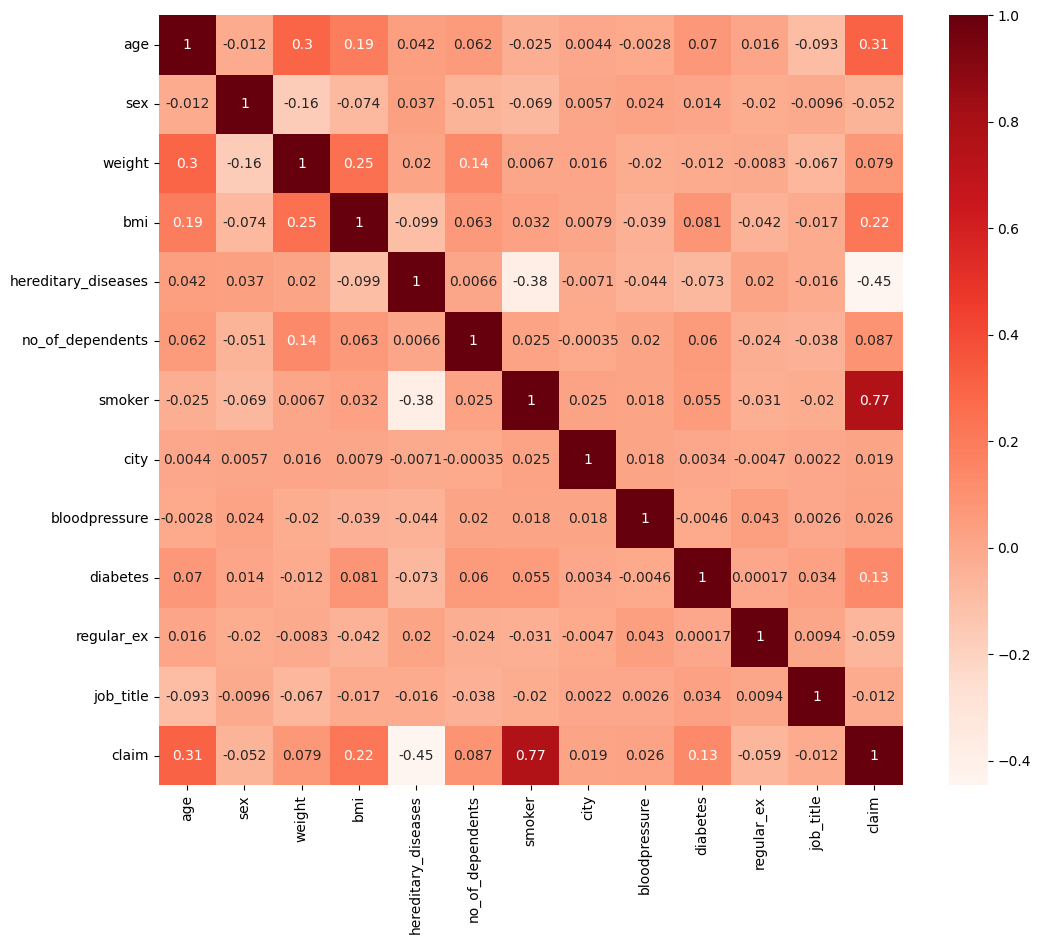

In [4]:
#now I want to have correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [5]:
import joblib
from sklearn.preprocessing import StandardScaler
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=69)
# Second split: Split the 40% temporary set into 25% test and 15% evaluation
X_eval, X_test, y_eval, y_test = train_test_split(X_temp, y_temp, test_size=(0.25/0.4), random_state=69)
scaler = StandardScaler()
scaler.fit(X_train)
joblib.dump(scaler, 'scaler.pkl')
#load scaler 
scaler = joblib.load('scaler.pkl')
X_train_scaled = scaler.transform(X_train)
X_eval_scaled = scaler.transform(X_eval)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)

[[-0.89546079 -1.02223043 -0.3409248  ...  0.52174589 -0.53422871
   0.90351143]
 [-0.39847008  0.97825302  0.91004049 ...  0.52174589 -0.53422871
  -1.02130913]
 [ 0.87950603 -1.02223043  1.13079907 ... -1.91664185 -0.53422871
   1.19223451]
 ...
 [-0.6114661   0.97825302 -1.5183039  ...  0.52174589 -0.53422871
  -1.31003222]
 [ 0.45351399  0.97825302 -0.12016622 ...  0.52174589  1.87185747
  -1.5987553 ]
 [ 1.37649674 -1.02223043 -0.92961435 ...  0.52174589 -0.53422871
  -0.34762194]]


In [8]:
#create a support vector regression model with the features 'age', 'smoker' and 'bmi' and 'diabetes'
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
svr = SVR()
#add hyperparameters, add polynomial kernel
svr = SVR(kernel='poly', degree=5, C=100, epsilon=0.1, gamma='scale')
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_eval_scaled)
mse = mean_squared_error(y_eval, y_pred)
print("Mean Squared Error: ", mse)
#print MAE, RMSE and MAPe for X_train_scaled, X_eval_scaled and X_test_scaled
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
y_pred = svr.predict(X_train_scaled)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_train, y_pred)
print("Train MAE: ", mae)
print("Train RMSE: ", rmse)
print("Train MAPE: ", mape)
y_pred = svr.predict(X_eval_scaled)
mae = mean_absolute_error(y_eval, y_pred)
mse = mean_squared_error(y_eval, y_pred)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_eval, y_pred)
print("Eval MAE: ", mae)
print("Eval RMSE: ", rmse)
print("Eval MAPE: ", mape)
y_pred = svr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Test MAE: ", mae)
print("Test RMSE: ", rmse)
print("Test MAPE: ", mape)


KeyboardInterrupt: 

In [9]:
import joblib
from sklearn.preprocessing import StandardScaler
#only consider age, bmi, smoker and diabetes
X = data[['age', 'bmi', 'smoker', 'diabetes']]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=69)
# Second split: Split the 40% temporary set into 25% test and 15% evaluation
X_eval, X_test, y_eval, y_test = train_test_split(X_temp, y_temp, test_size=(0.25/0.4), random_state=69)
scaler = StandardScaler()
scaler.fit(X_train)
joblib.dump(scaler, 'scaler.pkl')
#load scaler 
scaler = joblib.load('scaler.pkl')
X_train_scaled = scaler.transform(X_train)
X_eval_scaled = scaler.transform(X_eval)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)

[[-0.89546079 -0.1684676   2.0315298   0.52174589]
 [-0.39847008 -0.15224112 -0.49223989  0.52174589]
 [ 0.87950603  2.83343038 -0.49223989 -1.91664185]
 ...
 [-0.6114661  -0.72016776 -0.49223989  0.52174589]
 [ 0.45351399  0.5617238  -0.49223989  0.52174589]
 [ 1.37649674 -0.2333735  -0.49223989  0.52174589]]


In [11]:
#create a support vector regression model with the features 'age', 'smoker' and 'bmi' and 'diabetes'
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
svr = SVR()
#add hyperparameters, add polynomial kernel
svr = SVR(kernel='poly', degree=200, C=100, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_eval_scaled)
mse = mean_squared_error(y_eval, y_pred)
print("Mean Squared Error: ", mse)
#print MAE, RMSE and MAPe for X_train_scaled, X_eval_scaled and X_test_scaled
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
y_pred = svr.predict(X_train_scaled)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_train, y_pred)
print("Train MAE: ", mae)
print("Train RMSE: ", rmse)
print("Train MAPE: ", mape)
y_pred = svr.predict(X_eval_scaled)
mae = mean_absolute_error(y_eval, y_pred)
mse = mean_squared_error(y_eval, y_pred)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_eval, y_pred)
print("Eval MAE: ", mae)
print("Eval RMSE: ", rmse)
print("Eval MAPE: ", mape)
y_pred = svr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Test MAE: ", mae)
print("Test RMSE: ", rmse)
print("Test MAPE: ", mape)